In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

selected_features_mapping = {
'n_flows,n_packets,n_bytes,n_dest_asn,n_dest_ports,n_dest_ip,tcp_udp_ratio_packets,tcp_udp_ratio_bytes,dir_ratio_packets,dir_ratio_bytes,avg_duration,avg_ttl': 1,
'n_flows,n_packets,n_bytes': 2,
'n_bytes,n_dest_ports,n_dest_ip,dir_ratio_bytes,avg_ttl': 3, 
'tcp_udp_ratio_bytes,dir_ratio_bytes,avg_duration,avg_ttl': 4}

In [2]:
df_results = pd.read_csv("mlp_results.csv")
df_results['selected_features_mapped'] = df_results['selected_features'].map(selected_features_mapping)

## Top 10 MLP models by the macro F1-score

In [3]:
df_sorted = df_results.sort_values(by='F1_macro',ascending = False)
df_sorted.head(10)

,F1_macro,activation_f,batch_size,dropout,hidden_size,lr,num_layers,opt,preprocessing,selected_features,type,selected_features_mapped
1776,0.8047,sigmoid,256,0.2,1024,0.0001,4,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP,1
2585,0.8040,sigmoid,256,0.5,1024,0.0001,4,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP,1
1838,0.8034,sigmoid,256,0.0,1024,0.0001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP,1
8743,0.8033,sigmoid,256,0.0,1024,0.0001,4,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP,1
8076,0.8010,sigmoid,512,0.2,1024,0.0001,4,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP,1
3782,0.8007,sigmoid,256,0.0,1024,0.0001,5,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP,1
707,0.8005,sigmoid,256,0.5,1024,0.0001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP,1
9211,0.8001,sigmoid,256,0.2,1024,0.0001,5,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP,1
5720,0.7995,sigmoid,512,0.5,1024,0.0001,4,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP,1
7642,0.7990,sigmoid,256,0.2,1024,0.0001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP,1


##  Macro F1-score x hyperparameters graphs

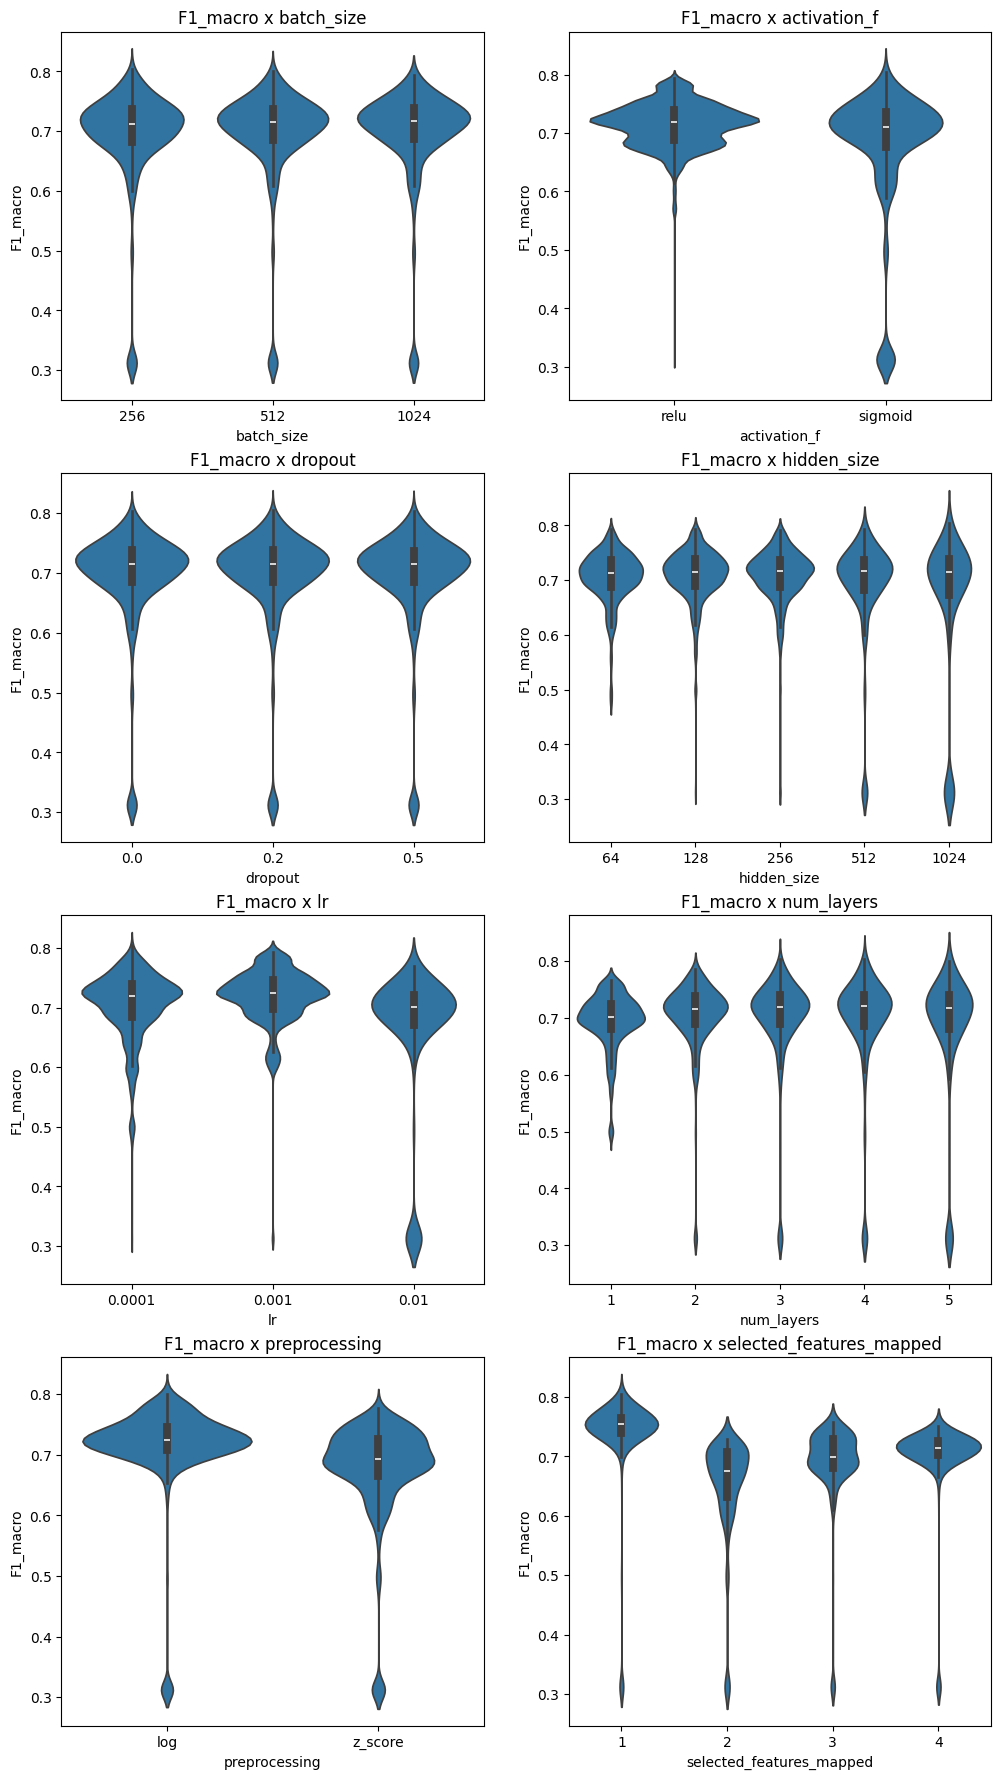

In [4]:
hyperparameters = ['batch_size', 'activation_f', 'dropout', 'hidden_size', 
        'lr', 'num_layers', 'preprocessing', 'selected_features_mapped']

fig, axes = plt.subplots(4, 2, figsize=(12, 22))
axes = axes.flatten()

for idx, param in enumerate(hyperparameters):
    sns.violinplot(data=df_results, x=param, y='F1_macro', ax=axes[idx])
    axes[idx].set_title(f'F1_macro x {param}')

plt.show()

##  Macro F1-score x hyperparameters statistics

In [5]:
def format_first_col_value(x):
    return str(x)                        

for hp in hyperparameters:
    summary_table = (
        df_results
        .groupby(hp)["F1_macro"]
        .agg(["mean", "median", "std", "max"])
        .reset_index()
    )

    first_col = summary_table.columns[0]
    summary_table[first_col] = summary_table[first_col].apply(format_first_col_value)

    print(f"\n===== Hyperparameter: {hp} =====\n")
    print(tabulate(
        summary_table,
        headers="keys",
        tablefmt="fancy_grid",
        showindex=False,
        floatfmt=".4f",
        stralign="center",
        numalign="center"
    ))



===== Hyperparameter: batch_size =====

╒══════════════╤════════╤══════════╤════════╤════════╕
│  batch_size  │  mean  │  median  │  std   │  max   │
╞══════════════╪════════╪══════════╪════════╪════════╡
│     256      │ 0.6934 │  0.7122  │ 0.0873 │ 0.8047 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     512      │ 0.6963 │  0.7151  │ 0.0854 │ 0.8010 │
├──────────────┼────────┼──────────┼────────┼────────┤
│     1024     │ 0.6967 │  0.7164  │ 0.0853 │ 0.7936 │
╘══════════════╧════════╧══════════╧════════╧════════╛

===== Hyperparameter: activation_f =====

╒════════════════╤════════╤══════════╤════════╤════════╕
│  activation_f  │  mean  │  median  │  std   │  max   │
╞════════════════╪════════╪══════════╪════════╪════════╡
│      relu      │ 0.7144 │  0.7187  │ 0.0374 │ 0.7940 │
├────────────────┼────────┼──────────┼────────┼────────┤
│    sigmoid     │ 0.6765 │  0.7103  │ 0.1126 │ 0.8047 │
╘════════════════╧════════╧══════════╧════════╧════════╛

===== Hyperparameter: